In [4]:
# Import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [5]:
df= pd.read_csv('TotalVacancies_Q32015_Q42019_2021_11_12.csv')
df.head()

,Unnamed: 0,REF_DATE,GEO,DGUID,National Occupational Classification,Job vacancy characteristics,Statistics,VALUE,STATUS
0,1143184,2015-04,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,451925.0,A
1,2286368,2015-07,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,407865.0,A
2,3429552,2015-10,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,358755.0,A
3,4572736,2016-01,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,330215.0,A
4,5715920,2016-04,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,391190.0,A


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            19 non-null     int64  
 1   REF_DATE                              19 non-null     object 
 2   GEO                                   19 non-null     object 
 3   DGUID                                 19 non-null     object 
 4   National Occupational Classification  19 non-null     object 
 5   Job vacancy characteristics           19 non-null     object 
 6   Statistics                            19 non-null     object 
 7   VALUE                                 19 non-null     float64
 8   STATUS                                19 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ KB


In [7]:
# drop all unnecessary columns 
df = df.loc[:,['REF_DATE','VALUE']]
df.head()
            

,REF_DATE,VALUE
0,2015-04,451925.0
1,2015-07,407865.0
2,2015-10,358755.0
3,2016-01,330215.0
4,2016-04,391190.0


In [8]:
df.rename(columns={'VALUE':'TotalVacancies'}, inplace=True)
df.head()

,REF_DATE,TotalVacancies
0,2015-04,451925.0
1,2015-07,407865.0
2,2015-10,358755.0
3,2016-01,330215.0
4,2016-04,391190.0


In [9]:
df['TotalVacancies'].sum()

8775240.0

In [10]:
#  convert the REF_DATE column into a datetime object
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')
df.head(19)

,REF_DATE,TotalVacancies
0,2015-04-01,451925.0
1,2015-07-01,407865.0
2,2015-10-01,358755.0
3,2016-01-01,330215.0
4,2016-04-01,391190.0
5,2016-07-01,404860.0
6,2016-10-01,381010.0
7,2017-01-01,387080.0
8,2017-04-01,459685.0
9,2017-07-01,467395.0


In [11]:
df.set_index('REF_DATE', inplace=True)

In [12]:
df.shape

(19, 1)

In [13]:
df.values

array([[451925.],
       [407865.],
       [358755.],
       [330215.],
       [391190.],
       [404860.],
       [381010.],
       [387080.],
       [459685.],
       [467395.],
       [469360.],
       [461845.],
       [546820.],
       [550670.],
       [547330.],
       [506140.],
       [581595.],
       [562910.],
       [508590.]])

## Time series Analysis 

In [14]:
#visualize the time series data

(array([16617., 16801., 16983., 17167., 17348., 17532., 17713., 17897.,
        18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

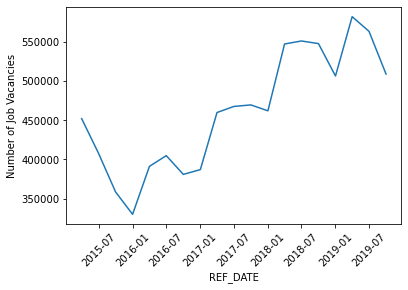

In [15]:
sns.lineplot(data= df, x='REF_DATE', y= 'TotalVacancies')
plt.ylabel('Number of Job Vacancies')
plt.xticks(rotation=45)

In [16]:
df.dtypes

TotalVacancies    float64
dtype: object

In [17]:
df.shape

(19, 1)

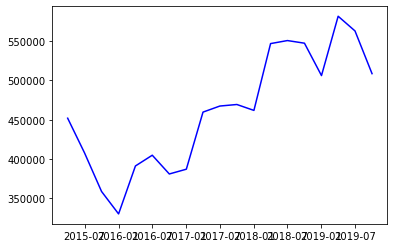

In [18]:
plt.plot(df, color="blue",label="Original vacancies Data")

In [19]:
df.shape

(19, 1)

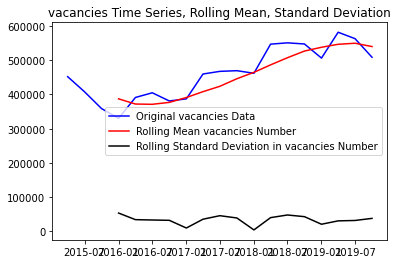

In [20]:
'''check for stationary
A stationary time series will not have any trends or seasonal patterns
We will use the Dickey Fuller test to check for stationarity in our data '''

rolling_mean = df.rolling(4).mean()
rolling_std = df.rolling(4).std()

#First, let’s make a Matplotlib plot of our time series
plt.plot(df, color="blue",label="Original vacancies Data")
# then the rolling mean
plt.plot(rolling_mean, color="red", label="Rolling Mean vacancies Number")
#And finally, the rolling standard deviation:
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in vacancies Number")
#Let’s then add a title:
plt.title("vacancies Time Series, Rolling Mean, Standard Deviation")
#And a legend:
plt.legend(loc="best")

In [21]:
#We will use the Dickey Fuller test to check for stationarity in our data
from statsmodels.tsa.stattools import adfuller
df_test=df.iloc[:,0].values
adft = adfuller(df_test,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0  -1.396640              Test Statistics
1   0.583886                      p-value
2   7.000000             No. of lags used
3  11.000000  Number of observations used
4  -4.223238          critical value (1%)
5  -3.189369          critical value (5%)
6  -2.729839         critical value (10%)


our data is not stationary as p value is higher than 0.05

In [22]:
# Checking for autocorrelation in time series data
# This is a measure of how correlated time series data is at a given point in time with past values
autocorrelation_lag1 = df['TotalVacancies'].autocorr(lag=1)
print("One Quarter Lag: ", autocorrelation_lag1)

One Quarter Lag:  0.8380764708563181


In [23]:
autocorrelation_lag2 = df['TotalVacancies'].autocorr(lag=2)
print("Two Quaretrs Lag: ", autocorrelation_lag2)

autocorrelation_lag3 = df['TotalVacancies'].autocorr(lag=3)
print("Three Quaretrs Lag: ", autocorrelation_lag3)

autocorrelation_lag4 = df['TotalVacancies'].autocorr(lag=4)
print("Four Quaretrs Lag: ", autocorrelation_lag4)

Two Quaretrs Lag:  0.695555219079688
Three Quaretrs Lag:  0.6984699858483016
Four Quaretrs Lag:  0.7744232851215945


the data is autocorrelated

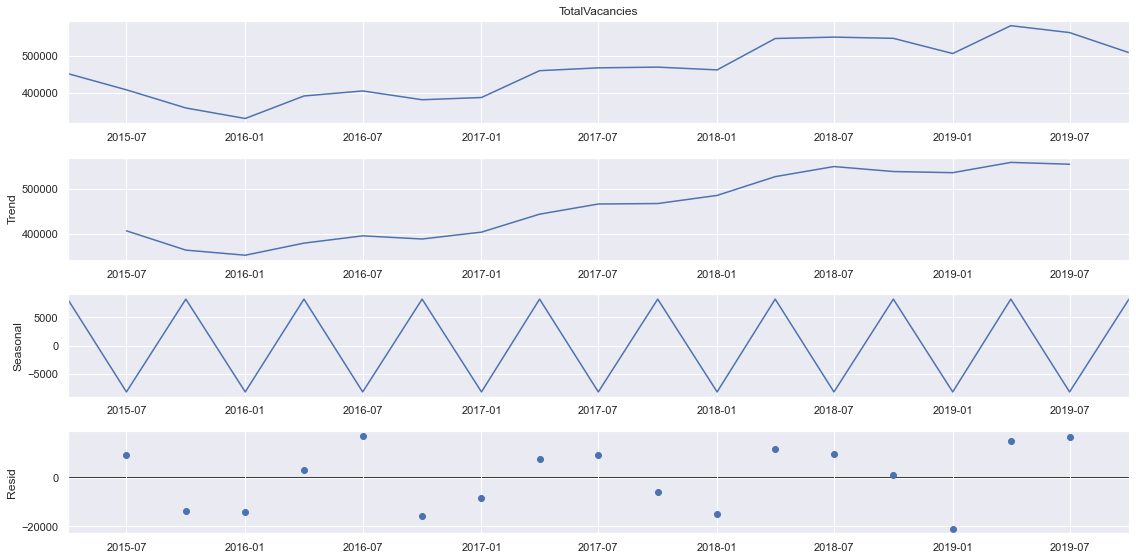

In [79]:
#Check for Trend decomposition is another useful way to visualize the trends in time series data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['TotalVacancies'],model='additive', period=2)
decompose.plot()
plt.show()

In [25]:
df.dtypes

TotalVacancies    float64
dtype: object

From this plot, we can clearly see the increasing trend in number of vacancies and the seasonality patterns in the rise and fall in values each year.

C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


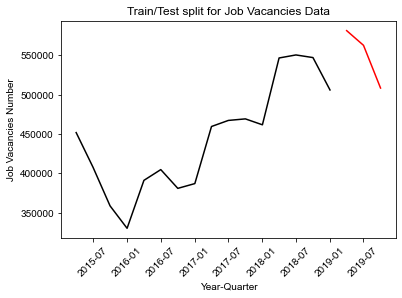

In [26]:
# Forescasting
df['REF_DATE']=df.index
train = df[df['REF_DATE'] < "2019-04-01"]
train['train'] = train['TotalVacancies']
del train['REF_DATE']
del train['TotalVacancies']

test = df[df['REF_DATE'] >= "2019-04-01"]
del test['REF_DATE']
test['test'] = test['TotalVacancies']
del test['TotalVacancies']

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Job Vacancies Data")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
sns.set()
plt.show()

In [27]:
df.dtypes

TotalVacancies           float64
REF_DATE          datetime64[ns]
dtype: object

## ARIMA

In [28]:
# import auto_arima from the pdmarima package, train our model and generate predictions using ARIMA
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=359.860, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=364.352, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=365.232, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=366.685, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=362.507, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=370.628, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=537.865, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=368.752, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=359.248, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=358.802, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=363.122, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=406.740, Time=0.0

In [29]:
output = df.merge(forecast, how='inner', left_index=True, right_index=True)
output.drop(columns='REF_DATE', inplace=True)
output.head()

,TotalVacancies,Prediction
REF_DATE,,
2019-04-01,581595.0,547197.827224
2019-07-01,562910.0,578440.727086
2019-10-01,508590.0,598473.019311


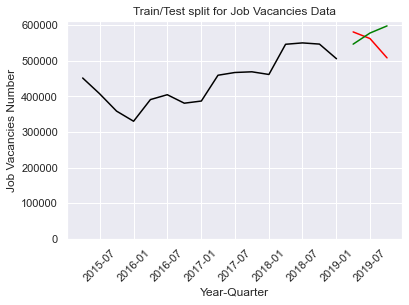

In [30]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast['Prediction'],color= 'green')
plt.title("Train/Test split for Job Vacancies Data")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
plt.ylim(ymin=0)
sns.set()
plt.show()

In [31]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  56282.993699489794


## SARIMA

source: https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

In [42]:
%matplotlib inline

In [43]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [82]:
# Dataset
data = df
data.index = data.REF_DATE
# Set the frequency
data.index.freq="QS-OCT"

# Fit the model (configuration is set using previous autocorreleation, trend decomposition tests)
mod = sm.tsa.statespace.SARIMAX(train, trend='n', order=(0,0,0),seasonal_order=(1, 1, 1, 2))
res = mod.fit(disp=False)
print(res.summary())

                                 SARIMAX Results                                 
Dep. Variable:                     train   No. Observations:                   16
Model:             SARIMAX(1, 1, [1], 2)   Log Likelihood                -168.010
Date:                   Sun, 14 Nov 2021   AIC                            342.020
Time:                           11:48:37   BIC                            343.937
Sample:                       04-01-2015   HQIC                           341.843
                            - 01-01-2019                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L2       -0.8905      0.191     -4.657      0.000      -1.265      -0.516
ma.S.L2        0.7837      0.295      2.658      0.008       0.206       1.362
sigma2       2.46e+09   1.47

C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [92]:
forecast2 = res.predict(test.index[0],test.index[-1], dynamic=True)
forecast2 = pd.DataFrame(forecast2.values,index = test.index,columns=['Prediction2'])
forecast2.head()

,Prediction2
REF_DATE,
2019-04-01,572922.137524
2019-07-01,538938.818991
2019-10-01,550133.012871


In [95]:
output2 = test.merge(forecast2, how='inner', left_index=True, right_index=True)
#output2.drop(columns='REF_DATE', inplace=True)
output2.head()

,test,Prediction2
REF_DATE,,
2019-04-01,581595.0,572922.137524
2019-07-01,562910.0,538938.818991
2019-10-01,508590.0,550133.012871


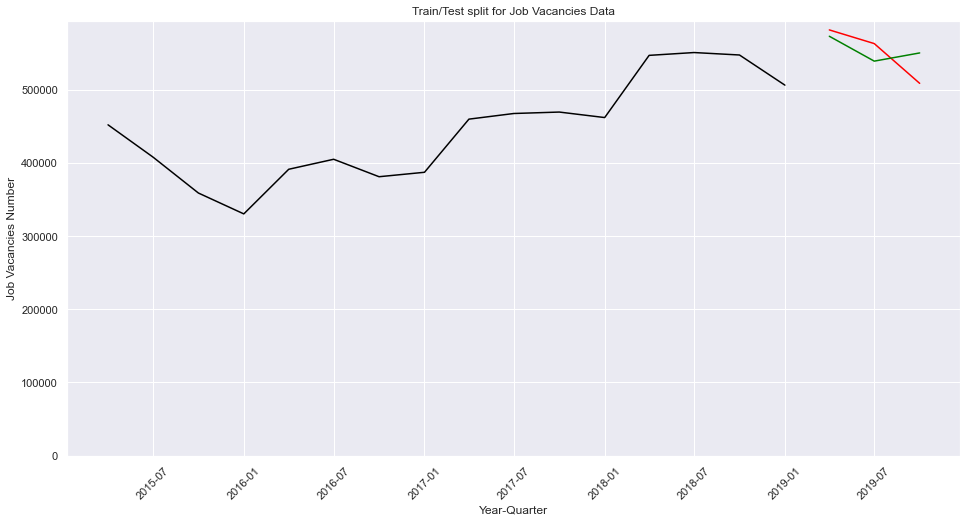

In [96]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast2['Prediction2'],color= 'green')
plt.title("Train/Test split for Job Vacancies Data")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
plt.ylim(ymin=0)
sns.set()
plt.show()

In [97]:
forecast2020 = res.predict('2020-01-01')
forecast2020.head()

2020-01-01    509732.334235
Freq: QS-OCT, dtype: float64

In [98]:
forecast2021 = res.predict('2021-01-01')
forecast2021.head()

2021-01-01    512580.85181
Freq: QS-OCT, dtype: float64

In [49]:
from pmdarima.arima import auto_arima

In [51]:
Arima_model=auto_arima(train, start_p=1, start_q=1, max_p=4, max_q=4, start_P=0, start_Q=0, max_P=4, max_Q=4, m=4, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=16)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=248.587, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=257.062, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=255.353, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=254.269, Time=0.06 sec
 ARIMA(1,1,1)(1,1,0)[4]             : AIC=250.580, Time=0.11 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=250.580, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[4]             : AIC=252.333, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=254.310, Time=0.04 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=254.668, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[4]             : AIC=250.398, Time=0.10 sec
 ARIMA(1,1,2)(0,1,0)[4]             : AIC=253.489, Time=0.17 sec
 ARIMA(0,1,2)(0,1,0)[4]             : AIC=253.478, Time=0.04 sec
 ARIMA(2,1,0)(0,1,0)[4]             : AIC=256.257, Time=0.04 sec
 ARIMA(2,1,2)(0,1,0)[4]             : AIC=255.730, Time=0.15 sec
 ARIMA(1,1,1)(0,1,0)[4] intercept   : AIC=259.1

In [66]:
# Dataset
data = df
data.index = data.REF_DATE
# Set the frequency
data.index.freq="QS-OCT"

# Fit the model (configuration is set using auto_arima)
mod2 = sm.tsa.statespace.SARIMAX(train, trend='n', order=(1,1,1),seasonal_order=(0, 1, 0, 4))
res2 = mod2.fit(disp=False)
print(res2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              train   No. Observations:                   16
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                -121.293
Date:                            Sun, 14 Nov 2021   AIC                            248.587
Time:                                    11:29:24   BIC                            249.781
Sample:                                04-01-2015   HQIC                           247.834
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5852      0.335      1.748      0.081      -0.071       1.241
ma.L1         -0.7619      0.259   

C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [100]:
forecast3 = res2.predict(test.index[0],test.index[-1], dynamic=True)
forecast3 = pd.DataFrame(forecast2.values,index = test.index,columns=['Prediction3'])
print(forecast3)

              Prediction3
REF_DATE                 
2019-04-01  572922.137524
2019-07-01  538938.818991
2019-10-01  550133.012871


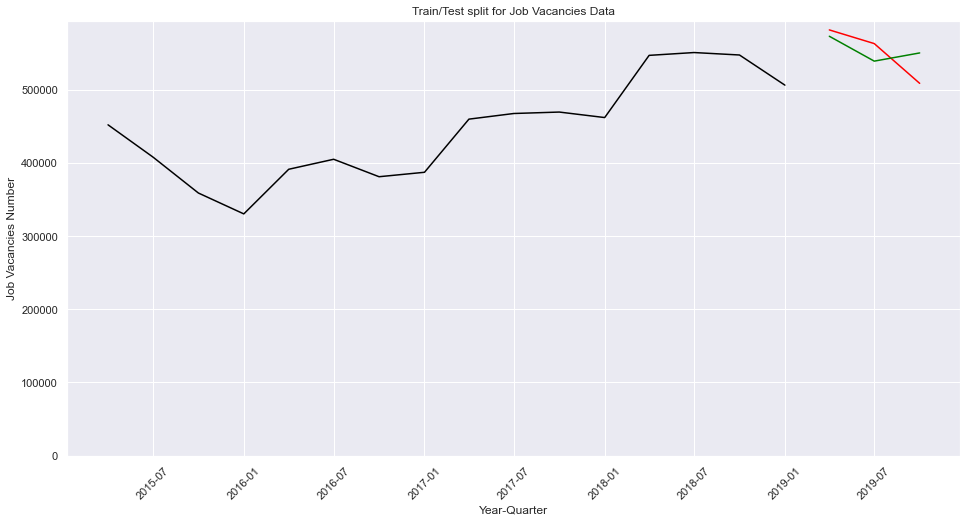

In [101]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast3['Prediction3'],color= 'green')
plt.title("Train/Test split for Job Vacancies Data")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
plt.ylim(ymin=0)
sns.set()
plt.show()